In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickets = pd.read_csv('data/anonymized_hubspot_tickets.csv')
deals = pd.read_csv('data/anonymized_hubspot_deals.csv')
companies = pd.read_csv('data/anonymized_hubspot_companies.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
tickets.head(n = 10)

,Create date,Ticket Tags,Stage Date - Project Launch,Associated Contact,Category,Target Launch Date,Kickoff Call,Close date,Pipeline,Stage Date - Project Initiation,Stage Date - Planning Phase,Ticket status,Stage Date - Execution,Time to first agent email reply (HH:mm:ss),Last CES survey rating,Priority,Associated Company,Who will be creating the Syms?,Stage Date - Closure Phase,Stage Date - Monitoring and Control Phase,Associated Company (Primary),Response time (HH:mm:ss),Ticket ID,Time to close (HH:mm:ss),Associated Deal,Library index approved,Training: General Overview,Latest Milestone,Training: Deployment/User Management Training,Requirements for the Trial,Training: Sym Building 101,Last modified date,Type,Trial End Date,Training: Sym Building 201,Stage Date - Converted Won,Latest Milestone Update Date,Ticket name,Trial Overview,Trial Start Date,1st Syms presented for review,Project Launch Day,Training: Reporting,Construction of 1st Sym begun,Trial Required,Was the sym QAed?
0,2023-12-18 15:02,NaN,NaN,Contact_b6d930b5,NaN,NaN,2023-12-27,2024-01-29 11:50,Project Success Plan,2023-12-18,NaN,Converted-Won,2024-01-02,NaN,NaN,NaN,Company_67d87cec,NaN,2024-01-29,NaN,Company_67d87cec,NaN,2193923207,1004:48:10,Deal_67d87cec,No,NaN,NaN,NaN,Coaching,NaN,2025-02-14 13:39,NaN,NaN,NaN,2024-02-06,NaN,Ticket_4baf7886,NaN,NaN,NaN,NaN,NaN,2023-12-27,NaN,NaN
1,2024-10-30 12:31,NaN,NaN,Contact_aa84b2e1,NaN,NaN,NaN,2025-02-10 11:18,Project Success Plan,NaN,NaN,Lost,NaN,49:24:00,NaN,NaN,Company_7588d0d5,NaN,NaN,NaN,Company_67d87cec,49:24:00,15899166073,2471:47:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-14 13:39,NaN,2024-11-07,NaN,NaN,NaN,Ticket_88dda9e1,NaN,2024-11-05,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-12 09:01,NaN,2025-01-10,Contact_fec7b624,NaN,NaN,2024-12-10,NaN,Project Success Plan,2024-12-13,NaN,Project Launch,2025-01-03,1516:30:41,NaN,NaN,Company_90e34cd3,NaN,NaN,NaN,Company_d9482f6a,1516:30:41,17452741013,NaN,Deal_2fddb8b0,Yes,2024-12-23,NaN,2024-12-23,Assessment; Coaching,2024-12-23,2025-02-14 13:39,NaN,2025-04-30,2024-12-23,NaN,NaN,Ticket_2226dda1,Trial until end of April,2024-12-11,2024-12-23,2025-01-06,2024-12-23,2024-12-11,NaN,NaN
3,2023-09-07 16:37,NaN,NaN,Contact_11c92d4d,NaN,2023-10-02,2023-06-08,2024-01-04 13:28,Project Success Plan,NaN,NaN,Converted-Won,NaN,26:25:51,NaN,NaN,Company_5c625991,NaN,NaN,NaN,Company_5c625991,26:25:51,1891106581,2853:51:33,NaN,NaN,2023-07-12,Kickoff Call,2023-07-19,Onboarding,2023-07-11,2025-02-14 13:39,NaN,NaN,2023-08-01,2024-01-04,2023-11-24,Ticket_6c996e04,"Coaching already implemented, adding onboardin...",NaN,NaN,2023-06-14,2023-07-19,NaN,NaN,NaN
4,2025-02-14 13:34,NaN,NaN,Contact_78b60b6b,NaN,NaN,NaN,NaN,Project Success Plan,2025-02-14,NaN,Planning Phase,NaN,13:32:11,NaN,NaN,Company_d828370b,NaN,NaN,NaN,Company_d828370b,13:32:11,20395039397,NaN,Deal_3c2a794a,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-17 23:38,NaN,NaN,NaN,NaN,NaN,Ticket_14c6e9a9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-07-31 10:27,NaN,2024-10-04,Contact_a4562b7d,NaN,NaN,2024-08-13,2024-12-20 11:12,Project Success Plan,2024-07-31,NaN,Lost,2024-09-13,00:06:00,NaN,NaN,Company_d29e78a9,NaN,2024-12-20,NaN,Company_d29e78a9,00:06:00,3049197180,3409:45:22,Deal_6f0d61c8,Yes,2024-09-23,NaN,2024-09-23,Onboarding,2024-09-23,2025-02-14 13:39,NaN,2024-10-02,2024-09-23,NaN,NaN,Ticket_c2ae38e4,Xfinity POC,2024-08-02,2024-09-23,2024-09-30,2024-09-23,2024-09-27,NaN,NaN
6,2024-07-31 10:28,NaN,2024-10-15,Contact_a4562b7d,NaN,NaN,2024-08-27,2024-12-20 11:12,Project Success Plan,2024-07-31,NaN,Lost,2024-09-20,00:04:59,NaN,NaN,Company_d29e78a9,NaN,2024-12-20,NaN,Company_d29e78a9,00:04:59,3049195860,3409:44:15,Deal_6f0d61c8,Yes,2024-09-24,NaN,2024-10-07,Onboarding,2024-10-01,2025-02-14 13:39,NaN,2024-10-02,2024-10-01,NaN,NaN,Ticket_5f8a9f64,Transcom POC for UPS,2024-08-02,2024-09-27,2024-10-10,2024-10-01,2024-09-16,NaN,NaN
7,2024-09-10 09:29,NaN,NaN,Contact_373c4ce1,NaN,NaN,2024-10-08,2024-12-20 11:12,Project Success Plan,2024-09-10,NaN,Converted-Won,2024-10-11,156:06:3

## EDA of tickets

### Basic Structure & Field Overview

In [4]:
tickets.describe()

,Ticket Tags,Category,Stage Date - Planning Phase,Last CES survey rating,Stage Date - Monitoring and Control Phase,Ticket ID,Was the sym QAed?
count,0.0,0.0,0.0,0.0,0.0,7.900000e+01,0.0
mean,NaN,NaN,NaN,NaN,NaN,7.229228e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,7.206699e+09,NaN
min,NaN,NaN,NaN,NaN,NaN,1.877074e+09,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.463114e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.816667e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.622139e+10,NaN
max,NaN,NaN,NaN,NaN,NaN,2.062269e+10,NaN


In [5]:
tickets.isnull().mean().sort_values(ascending=False)

Ticket Tags                                      1.000000
Category                                         1.000000
Stage Date - Planning Phase                      1.000000
Was the sym QAed?                                1.000000
Stage Date - Monitoring and Control Phase        1.000000
Last CES survey rating                           1.000000
Priority                                         0.987342
Type                                             0.987342
Trial Required                                   0.987342
Who will be creating the Syms?                   0.962025
Training: Sym Building 201                       0.759494
Latest Milestone                                 0.746835
Latest Milestone Update Date                     0.746835
1st Syms presented for review                    0.734177
Training: Reporting                              0.696203
Training: Sym Building 101                       0.683544
Training: Deployment/User Management Training    0.670886
Stage Date - C

In [6]:
### remove columns with more than 90% missing values
tickets_col_remove = tickets.loc[:, tickets.isnull().mean() > 0.9].columns
tickets = tickets.loc[:, tickets.isnull().mean() < 0.9]

In [7]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Create date                                    79 non-null     object
 1   Stage Date - Project Launch                    31 non-null     object
 2   Associated Contact                             78 non-null     object
 3   Target Launch Date                             29 non-null     object
 4   Kickoff Call                                   49 non-null     object
 5   Close date                                     55 non-null     object
 6   Pipeline                                       79 non-null     object
 7   Stage Date - Project Initiation                53 non-null     object
 8   Ticket status                                  79 non-null     object
 9   Stage Date - Execution                         37 non-null     obje

### EDA

In [8]:
# Creat new features
# Implementation duration
tickets['Create date'] = pd.to_datetime(tickets['Create date'], errors='coerce')
tickets['Close date'] = pd.to_datetime(tickets['Close date'], errors='coerce')
tickets['Implementation Duration Days'] = (tickets['Close date'] - tickets['Create date']).dt.days

# Response time in hours
if 'Response time' in tickets.columns:
    tickets_df['Response Hours'] = pd.to_timedelta(tickets['Response time'], errors='coerce').dt.total_seconds() / 3600

# Training completion
training_cols = [col for col in tickets.columns if col.startswith('Training:')]
tickets['Training Completion Count'] = tickets[training_cols].notnull().sum(axis=1)
tickets['Training Completion %'] = tickets['Training Completion Count'] / len(training_cols)

# Success flag
tickets['Is Successful'] = (tickets['Ticket status'].str.lower().str.contains('won')).astype(int)


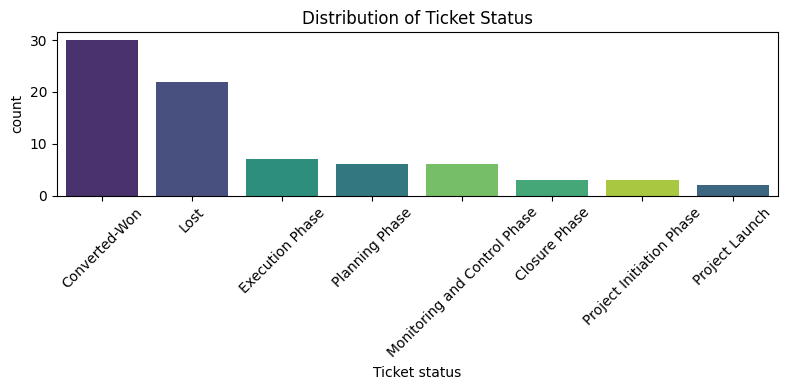

In [9]:
# Ticket status distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=tickets, x='Ticket status', order=tickets['Ticket status'].value_counts().index, hue='Ticket status', palette="viridis")
plt.title("Distribution of Ticket Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

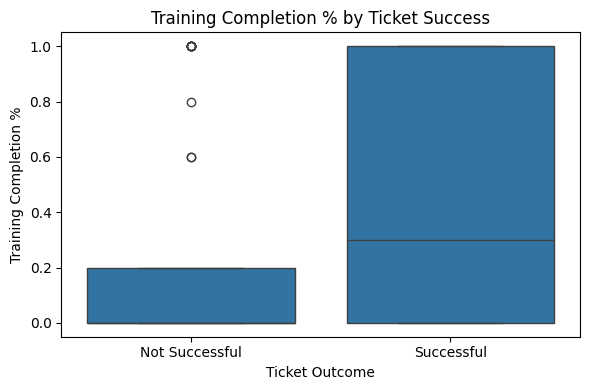

In [10]:
# Training Completion % by Ticket Success
plt.figure(figsize=(6, 4))
sns.boxplot(x='Is Successful', y='Training Completion %', data=tickets)
plt.title('Training Completion % by Ticket Success')
plt.xticks([0, 1], ['Not Successful', 'Successful'])
plt.xlabel("Ticket Outcome")
plt.ylabel("Training Completion %")
plt.tight_layout()
plt.show()

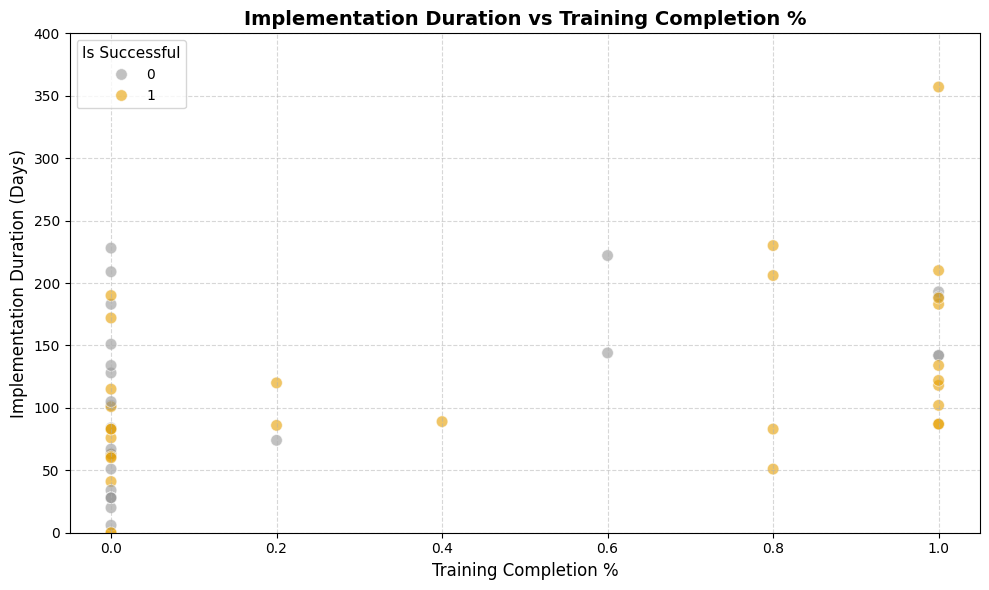

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=tickets,
    x='Training Completion %',
    y='Implementation Duration Days',
    hue='Is Successful',
    palette={0: "#999999", 1: "#E69F00"},
    alpha=0.6,
    s=70
)
plt.title("Implementation Duration vs Training Completion %", fontsize=14, fontweight='bold')
plt.xlabel("Training Completion %", fontsize=12)
plt.ylabel("Implementation Duration (Days)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 400)
plt.legend(title='Is Successful', title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()

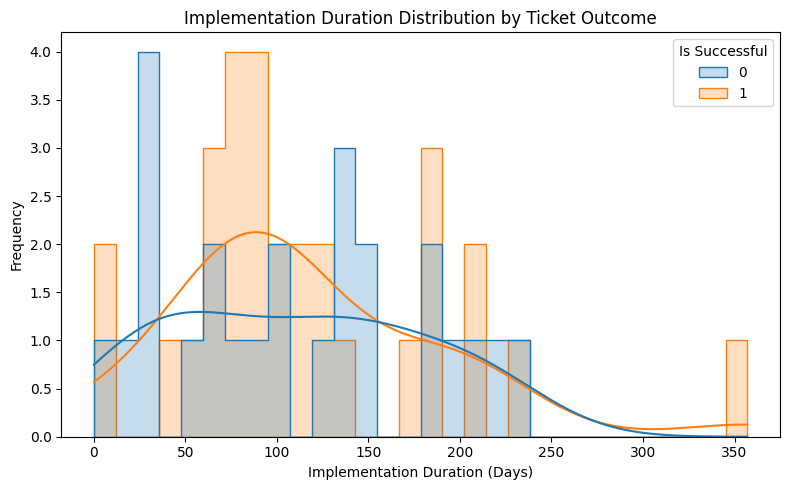

In [12]:
# Implementation Duration Distribution by Ticket Success
plt.figure(figsize=(8, 5))
sns.histplot(data=tickets, x='Implementation Duration Days', bins=30, hue='Is Successful', kde=True, element='step')
plt.title("Implementation Duration Distribution by Ticket Outcome")
plt.xlabel("Implementation Duration (Days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Successful projects tend to cluster within 50-100 days of implementation duration, while unsuccessful ones are more spread out, indicating inconsistent or prolonged timelines.

# Merge the tickets dataframe and the companies dataset
### Approach 1: Use the Associated Company (Primary) from tickets and Company name from companies to merge the 2 dataframes, only 48 overlaps

### To connect tickets data with other datasets:
- Associated Company (Primary) --> links to companies dataset (doesn't work very well) 
- Associated Deal --> links to deals dataset
- Ticket ID --> links to companies dataset via CompanyToTickets mapping

In [13]:
### only 48 out of 79 overlaps between company ids from ticket and company dataset
len(set(tickets['Associated Company (Primary)']).intersection(companies['Company name']))

48

### Approach 2: Use the mappings from the mappings.json file

In [14]:
### read in the mapping file
import json

with open('mappings.json', 'r') as f:
    mappings = json.load(f)

In [15]:
mappings.keys()

dict_keys(['CompanyToDeals', 'CompanyToTickets', 'ParentChildRelationships', 'TicketToDeal'])

- `CompanyToDeals`: contains the mappings from company ID to Deals ID
- `CompanyToTickets`: contains the mappings from company ID to Tickets ID
- `TicketToDeal`: contains the mappings from Ticket ID to Deal ID 

In [16]:
list(mappings['CompanyToTickets'].items())[:2]
### key is the company id and value is a list of tickets ID, same company can have multiple tickets ID

[('9366128719', ['2227268264']),
 ('9355871862',
  ['1153128060',
   '1184439975',
   '1255495303',
   '1258208860',
   '1265785475',
   '1271135644',
   '1294735265',
   '1296806165',
   '1305598867',
   '1317059345',
   '1353741690',
   '1377812063',
   '1380677892',
   '1428597842',
   '1436802687',
   '1444251475',
   '1486045610',
   '1486225212',
   '1490751498',
   '1501062400',
   '1525208184',
   '1526946139',
   '1528572955',
   '1531938692',
   '1575993731',
   '1578772008',
   '1595350578',
   '1597266872',
   '1597391905',
   '1601174888',
   '1602159132',
   '1606567201',
   '1606585647',
   '1606960707',
   '1608271468',
   '1608744106',
   '1609058103',
   '1609091896',
   '1609096794',
   '1609111093',
   '1609765740',
   '1609979182',
   '1610373386',
   '1610467704',
   '1610471190',
   '1610477343',
   '1610876991',
   '1611925122',
   '1613205790',
   '1615039154',
   '1615155028',
   '1615740539',
   '1616085107',
   '1616912930',
   '1616927862',
   '1617059116',

### Now, create a dictionary based on mappings['CompanyToTickets'] where the keys are ticket IDs and the values are company IDs. This will give us a one-to-one mapping between ticket IDs and company IDs, which we can later use to add a new company_id column to the ticket DataFrame.

In [17]:
# revert the company-ticket mapping
ticket_to_company = {}

for company_id, ticket_list in mappings["CompanyToTickets"].items():
    for ticket_id in ticket_list:
        ticket_to_company[ticket_id] = company_id

In [18]:
# ticket_to_company

In [19]:
### convert the ticket id column into string type
tickets['Ticket ID'] = tickets['Ticket ID'].astype(str)


In [20]:
### create a company ID column in the tickets dataset based on 'ticket_to_company' dictionary
tickets['Company ID'] = tickets['Ticket ID'].map(ticket_to_company)

In [21]:
### filter the company dataset and only keep columns with less than 90% missing values, you can also try your own threshold
companies = companies.loc[:, companies.isnull().mean() < 0.9]

In [22]:
### convert the integer type into string type for later mapping
companies['Record ID'] = companies['Record ID'].astype(str)

In [23]:
### you can merge the companys dataframe and the ticket dataframe
### here I did left merge, so only 79 rows are kept since tickets data only contains 79 rows
merged_tickets = pd.merge(left = tickets, right= companies, left_on= 'Company ID', right_on = 'Record ID', how = 'left')

In [24]:
merged_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 64 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Create date                                    79 non-null     datetime64[ns]
 1   Stage Date - Project Launch                    31 non-null     object        
 2   Associated Contact_x                           78 non-null     object        
 3   Target Launch Date                             29 non-null     object        
 4   Kickoff Call                                   49 non-null     object        
 5   Close date                                     55 non-null     datetime64[ns]
 6   Pipeline                                       79 non-null     object        
 7   Stage Date - Project Initiation                53 non-null     object        
 8   Ticket status                                  79 non-null    

# Upsell Customer Analysis

In [25]:
company_to_deals = mappings.get("CompanyToDeals", {})
mapping_list = []
for comp_id, deal_ids in company_to_deals.items():
    for deal_id in deal_ids:
        mapping_list.append({"Company_Record_ID": comp_id, "Deal_Record_ID": deal_id})
mapping_df = pd.DataFrame(mapping_list)

deals["Record ID"] = deals["Record ID"].astype(str)
mapping_df["Deal_Record_ID"] = mapping_df["Deal_Record_ID"].astype(str)

# Merge mapping DataFrame with deals data (assuming deals_df has a "Record ID" for each deal)
deals_with_company = pd.merge(mapping_df, deals, left_on="Deal_Record_ID", right_on="Record ID", how="inner")

In [26]:
# Filter deals where the Deal Type is "Upsell" (case-insensitive)
upsell_deals = deals_with_company[deals_with_company["Deal Type"] == "Growth"]

# Extract the unique Company_Record_IDs from the upsell deals
upsell_companies = upsell_deals["Company_Record_ID"].unique()

# Optionally, print the list of upsell company IDs for verification
print("Upsell company IDs:")
print(upsell_companies)

Upsell company IDs:
['9366136383' '9355871862' '16206048635' '14806346252' '10733490991'
 '10558217137' '11658771267' '9366092049' '18475337759' '9363073402'
 '11660991668' '9732328558' '9363076424' '12067836436' '16259826285'
 '12538423704' '9645904458' '9499343195' '29828266075' '10925369261'
 '10203327033' '9362275418' '29832756755' '9366069360' '9366155052'
 '9960233587' '9366059417' '29912622494' '15028171942' '9366087789'
 '9360792947' '9366168475' '29543474616']


In [27]:
# Ensure that the company ID columns in merged_tickets and upsell_companies have matching types (as strings)
merged_tickets["Record ID"] = merged_tickets["Record ID"].astype(str)
upsell_companies = [str(x) for x in upsell_companies]

# Mark upsell customers: add a new column "Upsell_Customer" (True if company's Record ID is in upsell_companies, otherwise False)
merged_tickets["Upsell_Customer"] = merged_tickets["Record ID"].isin(upsell_companies)

In [28]:
# Define the training-related columns based on the data dictionary.
training_fields = [
    "Training: Sym Building 101",
    "Training: Sym Building 201",
    "Training: General Overview",
    "Training: Reporting",
    "Training: Deployment/User Management Training"
]

# Define a function to count how many training sessions are completed.
def count_trainings(row):
    count = 0
    # For each training field, if the value is not null and not empty, count it as completed.
    for col in training_fields:
        if pd.notnull(row[col]) and str(row[col]).strip() != "":
            count += 1
    return count

# Assuming merged_tickets is your DataFrame after merging tickets and companies,
# apply the function row-wise to add a new column 'Training_Completed_Count'.
merged_tickets["Training_Completed_Count"] = merged_tickets.apply(count_trainings, axis=1)

# Preview the training count
print("Merged tickets with Training Completed Count:")
print(merged_tickets[["Record ID"] + training_fields + ["Training_Completed_Count"]].head())

Merged tickets with Training Completed Count:
     Record ID Training: Sym Building 101 Training: Sym Building 201  \
0  11466483988                        NaN                        NaN   
1  29543474616                        NaN                        NaN   
2  16275185826                 2024-12-23                 2024-12-23   
3  15851984185                 2023-07-11                 2023-08-01   
4  29965090080                        NaN                        NaN   

  Training: General Overview Training: Reporting  \
0                        NaN                 NaN   
1                        NaN                 NaN   
2                 2024-12-23          2024-12-23   
3                 2023-07-12          2023-07-19   
4                        NaN                 NaN   

  Training: Deployment/User Management Training  Training_Completed_Count  
0                                           NaN                         0  
1                                           NaN         

In [29]:
# Group the merged_tickets data by the company's "Record ID".
# For each company, we take the maximum training count seen among all of its tickets;
# this assumes that if any ticket indicates training completion, the company has completed it.
company_training = merged_tickets.groupby("Record ID").agg(
    Max_Training_Completed = pd.NamedAgg(column="Training_Completed_Count", aggfunc="max")
).reset_index()

# Preview the aggregated training data.
print("Aggregated Training Data by Company:")
print(company_training.head())

Aggregated Training Data by Company:
     Record ID  Max_Training_Completed
0  10203327033                       0
1  10558877741                       5
2  10733490991                       4
3  11466483988                       0
4  12549492871                       5


In [30]:
companies_with_training = pd.merge(merged_tickets, company_training, on="Record ID", how="left")
# Separate the companies into upsell and non-upsell groups based on the Upsell_Customer flag.
upsell_customers = companies_with_training[companies_with_training["Upsell_Customer"] == True]
non_upsell_customers = companies_with_training[companies_with_training["Upsell_Customer"] == False]

# Compute the average and median training completion count for each group.
avg_training_upsell = upsell_customers["Max_Training_Completed"].mean()
median_training_upsell = upsell_customers["Max_Training_Completed"].median()

avg_training_nonupsell = non_upsell_customers["Max_Training_Completed"].mean()
median_training_nonupsell = non_upsell_customers["Max_Training_Completed"].median()

print("Upsell customers - Average Training Completed Count: {:.2f}, Median: {}".format(avg_training_upsell, median_training_upsell))
print("Non-Upsell customers - Average Training Completed Count: {:.2f}, Median: {}".format(avg_training_nonupsell, median_training_nonupsell))

Upsell customers - Average Training Completed Count: 1.94, Median: 0.0
Non-Upsell customers - Average Training Completed Count: 2.26, Median: 1.0


# Time Analysis

In [32]:
# Convert key date fields to datetime format
date_fields = ["Trial Start Date", "Trial End Date", "Target Launch Date", "Stage Date - Project Launch"]
for field in date_fields:
    merged_tickets[field] = pd.to_datetime(merged_tickets[field], errors='coerce')

# Calculate the trial duration as the difference between Trial End Date and Trial Start Date (in days)
merged_tickets["Trial_Duration"] = (merged_tickets["Trial End Date"] - merged_tickets["Trial Start Date"]).dt.days

# Calculate the duration from the end of the trial to the target official launch (in days)
merged_tickets["Trial_to_Launch"] = (merged_tickets["Trial End Date"] - merged_tickets["Target Launch Date"]).dt.days

# Calculate the duration from the trial end to the project launch stage (in days)
merged_tickets["Launch_to_Execution"] = (merged_tickets["Stage Date - Project Launch"] - merged_tickets["Trial End Date"]).dt.days

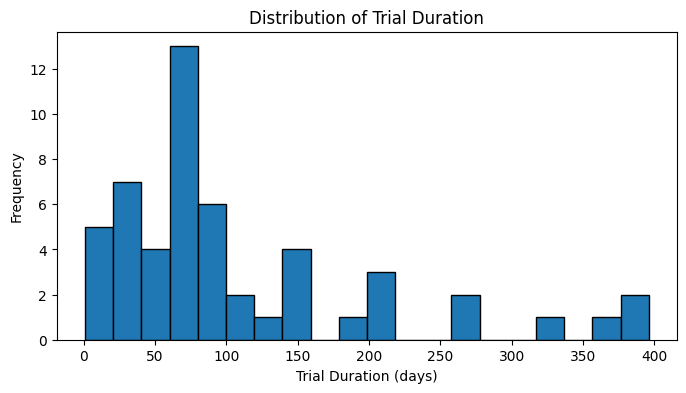

In [33]:
# Plot a histogram of Trial Duration to observe its distribution
plt.figure(figsize=(8,4))
plt.hist(merged_tickets["Trial_Duration"].dropna(), bins=20, edgecolor="k")
plt.xlabel("Trial Duration (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Trial Duration")
plt.show()

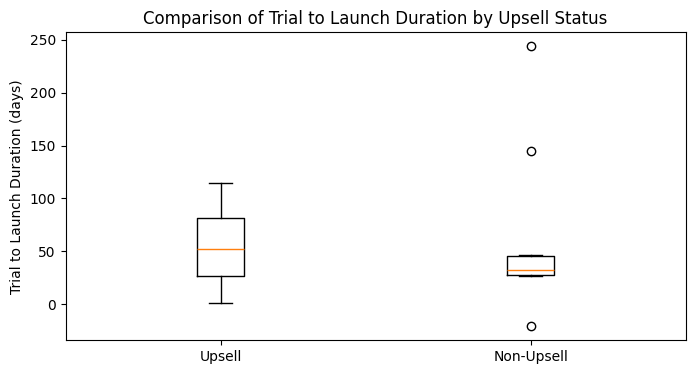

In [34]:
# If the Upsell_Customer flag exists, compare the Trial_to_Launch duration for Upsell and Non-Upsell customers using a boxplot
if "Upsell_Customer" in merged_tickets.columns:
    plt.figure(figsize=(8,4))
    data_to_plot = [
        merged_tickets[merged_tickets["Upsell_Customer"] == True]["Trial_to_Launch"].dropna(),
        merged_tickets[merged_tickets["Upsell_Customer"] == False]["Trial_to_Launch"].dropna()
    ]
    plt.boxplot(data_to_plot, tick_labels=["Upsell", "Non-Upsell"])
    plt.ylabel("Trial to Launch Duration (days)")
    plt.title("Comparison of Trial to Launch Duration by Upsell Status")
    plt.show()